In [1]:
import pandas as pd
df=pd.read_csv("C:/Users/SCIENCE/Downloads/AirPassengers.csv", parse_dates=True, index_col=[0])
df

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [2]:
import itertools
import warnings
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_percentage_error

In [3]:
ts1=df['#Passengers'].resample("M").sum()
ts1

Month
1949-01-31    112
1949-02-28    118
1949-03-31    132
1949-04-30    129
1949-05-31    121
             ... 
1960-08-31    606
1960-09-30    508
1960-10-31    461
1960-11-30    390
1960-12-31    432
Freq: M, Name: #Passengers, Length: 144, dtype: int64

In [4]:
data=ts1
df = pd.DataFrame(data)

# First-order differencing
df['first_diff'] = df['#Passengers'].diff()

# Drop NaN values (if needed)
df.dropna(inplace=True)

# Print result
print(df.columns)

Index(['#Passengers', 'first_diff'], dtype='object')


<Axes: xlabel='Month'>

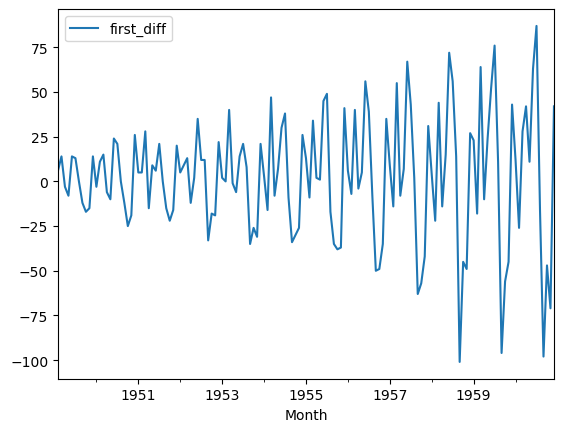

In [5]:
ts=df.drop('#Passengers', axis=1)
ts.plot()

<Axes: title={'center': 'Final Stationary Series'}, xlabel='Month'>

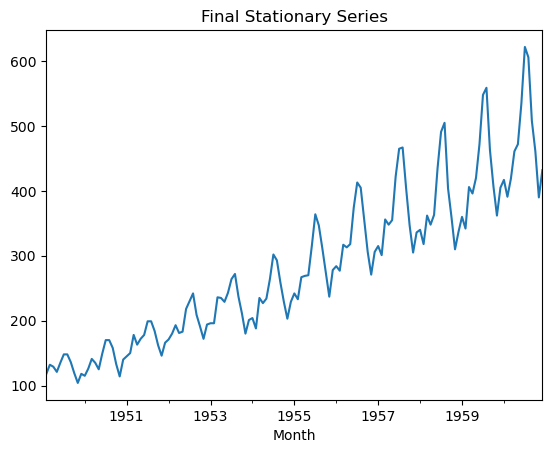

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

def adf_test(series):
    result = adfuller(series)
    return result[1]  # Return the p-value

def make_stationary(series, seasonal_period=None, max_d=2, max_D=1):
    temp_series = series.copy()
    
    # Check initial stationarity
    p_val = adf_test(temp_series)
    d = 0
    D = 0
    
    # Differencing logic here...
    
    return temp_series.dropna()

# Apply to your time series
df['stationary_series'] = make_stationary(ts1)
df['stationary_series'].plot(title="Final Stationary Series")

In [7]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series):
    result = adfuller(series)
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    return result[1]  # p-value < 0.05 means stationary

p_value = adf_test(ts)
if p_value < 0.05:
    print("Series is stationary, d=0")
else:
    print("Series is non-stationary, consider differencing (d=1 or more)")


ADF Statistic: -2.829266824169988
p-value: 0.05421329028382707
Series is non-stationary, consider differencing (d=1 or more)


<function matplotlib.pyplot.show(close=None, block=None)>

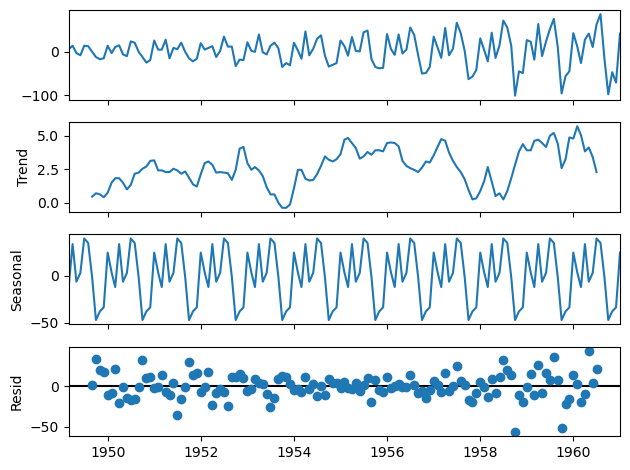

In [8]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(ts)
fig = decomposition.plot()
plt.show

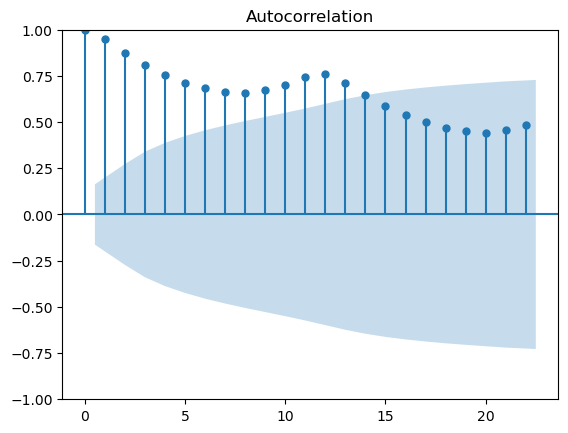

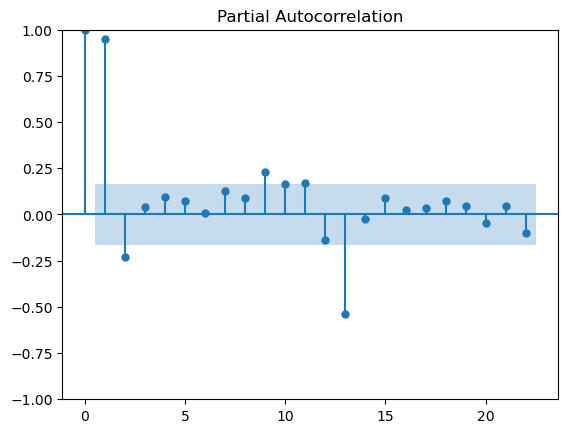

In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf = plot_acf(ts1)
pacf = plot_pacf(ts1)

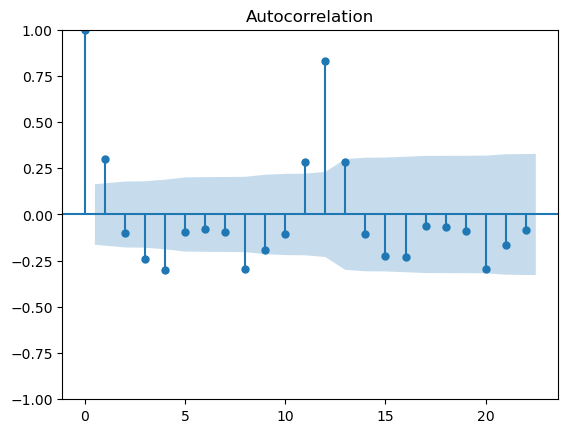

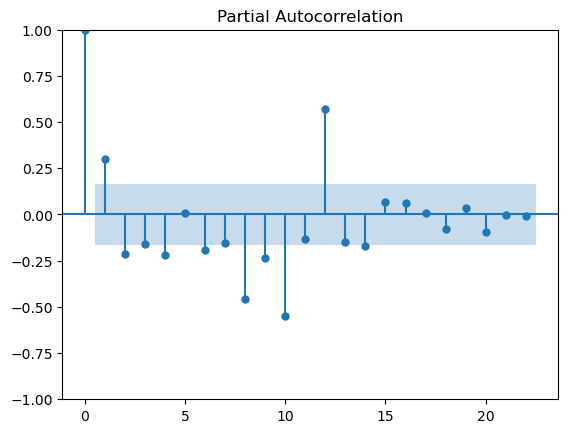

In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf = plot_acf(ts)
pacf = plot_pacf(ts)

In [11]:
#Periodicity Summary
#After performing the above steps, summarize your findings:

#From ACF: Look at the lags with significant correlations and determine the possible periods (e.g., lag 12 suggests annual seasonality for monthly data).
#From Decomposition: Look for repeating patterns in the seasonal component.
#From Fourier: Identify frequencies with higher magnitudes for seasonality.
#Example of Interpreting Results:
#If you see a peak at lag 12 in the ACF plot:

#This suggests seasonality with a period of 12, which would indicate yearly seasonality in monthly data.

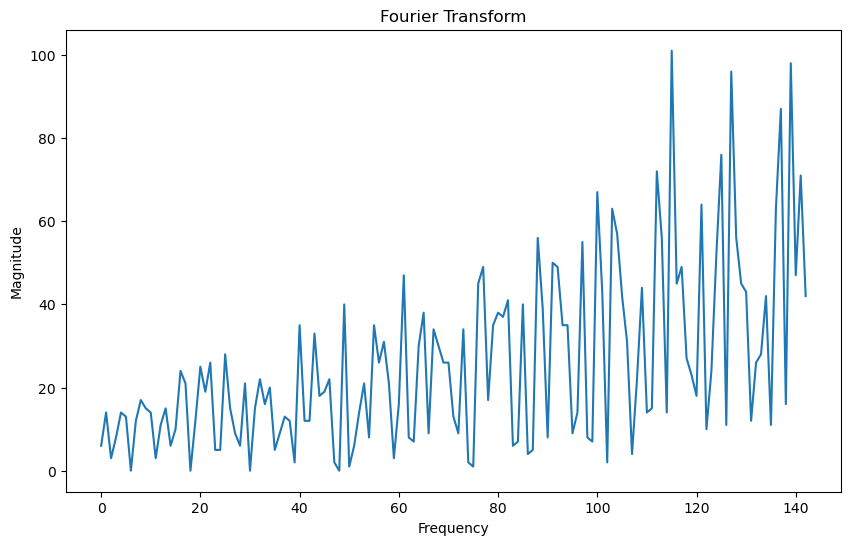

In [12]:
import numpy as np

# Perform Fourier Transform
fft_values = np.fft.fft(ts.dropna())

# Plot the magnitude of the Fourier coefficients
plt.figure(figsize=(10, 6))
plt.plot(np.abs(fft_values))
plt.title('Fourier Transform')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.show()

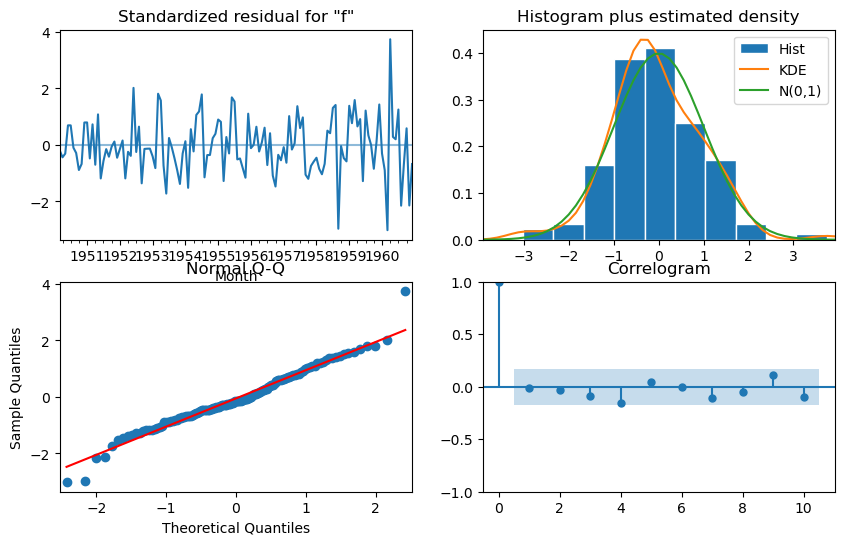

In [13]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMA model (example: seasonal period = 12 for monthly data with yearly seasonality)
model = SARIMAX(ts, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Plot the seasonal component
results.plot_diagnostics(figsize=(10, 6))
plt.show()

In [14]:
import pandas as pd
from astropy.timeseries import LombScargle

# Example: load your dataset (replace this with your actual DataFrame)
# ts = pd.read_csv('your_file.csv')  # Ensure the correct path if you're reading from a file

# Checking column names to understand the issue
print("Columns in DataFrame:", ts.columns)

# Remove any leading/trailing spaces in column names
ts.columns = ts.columns.str.strip()

# Check if 'Month' column exists
if 'Month' in ts.columns:
    # Prepare the time and values
    time = ts['Month'].values  # Time values (could be in datetime format)
    values = ts['fist_value'].values  # Your time series values (replace with correct column name if needed)

    # Compute Lomb-Scargle periodogram
    ls = LombScargle(time, values)
    frequency, power = ls.autopower()

    # You can plot or analyze `frequency` and `power` as needed
    print("Frequencies:", frequency)
    print("Power:", power)
else:
    print("Column 'Month' not found. Available columns are:", ts.columns)
    # Handle the case where the 'Month' column is missing
    # If you intended to use another column, modify accordingly
    print(ts.columns)

Columns in DataFrame: Index(['first_diff'], dtype='object')
Column 'Month' not found. Available columns are: Index(['first_diff'], dtype='object')
Index(['first_diff'], dtype='object')


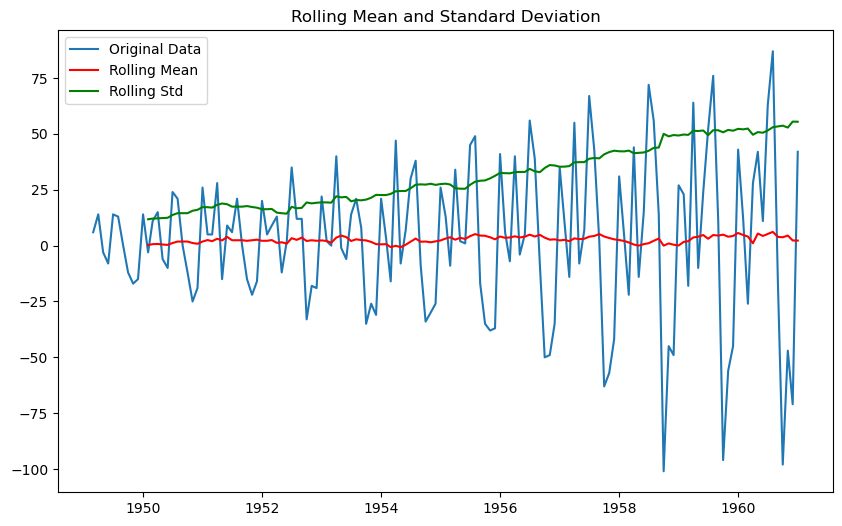

In [15]:
# Rolling mean and rolling standard deviation
window_size = 12# Adjust according to your seasonality period (e.g., 12 for monthly data with yearly seasonality)

# Rolling mean
df['rolling_mean'] = ts["first_diff"].rolling(window=window_size).mean()

# Rolling standard deviation
df['rolling_std'] = ts["first_diff"].rolling(window=window_size).std()

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(ts['first_diff'], label='Original Data')
plt.plot(df['rolling_mean'], label='Rolling Mean', color='red')
plt.plot(df['rolling_std'], label='Rolling Std', color='green')
plt.legend()
plt.title('Rolling Mean and Standard Deviation')
plt.show()

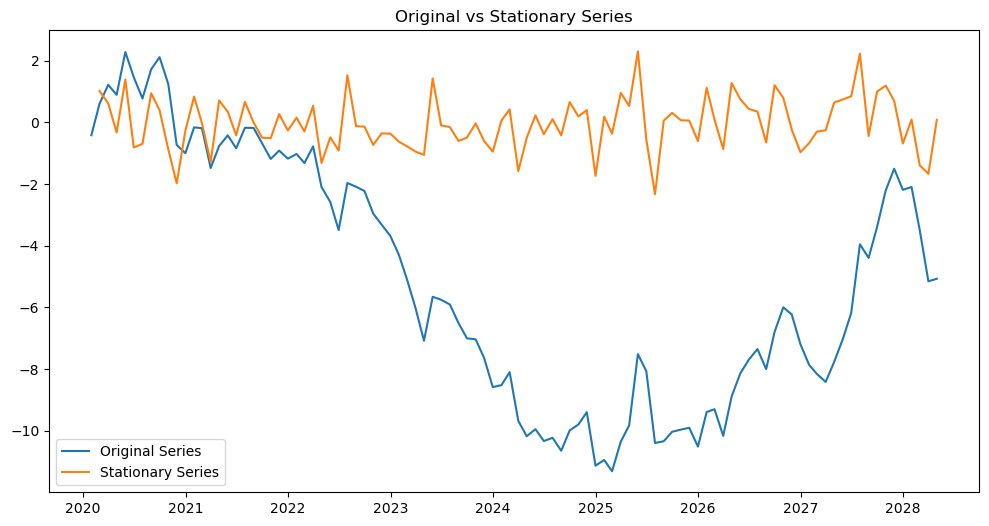

C:\Users\SCIENCE\Desktop\anaco\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


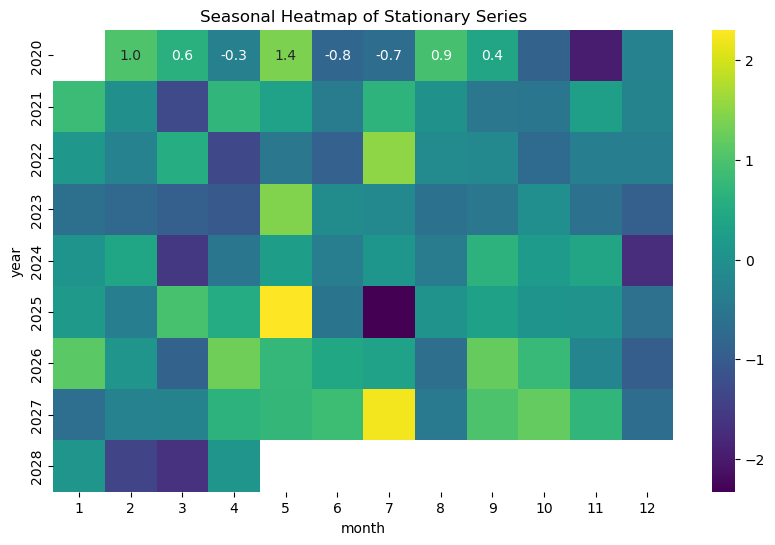

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

# Sample time series data (replace this with your actual data)
dates = pd.date_range(start='2020-01-01', periods=100, freq='M')
values = np.random.randn(100).cumsum()  # Random walk for example
ts = pd.Series(values, index=dates, name='original_series')

# Create a DataFrame to store results
df = pd.DataFrame(ts)

# Function to perform ADF test
def adf_test(series):
    result = adfuller(series, autolag='AIC')
    return result[1]  # Return p-value

# Function to make a time series stationary
def make_stationary(series, seasonal_period=None, max_d=2, max_D=1):
    temp_series = series.copy()
    
    # Check initial stationarity
    p_val = adf_test(temp_series)
    d = 0
    D = 0
    
    # Apply differencing if not stationary
    while p_val > 0.05 and d < max_d:
        temp_series = temp_series.diff().dropna()
        p_val = adf_test(temp_series)
        d += 1
    
    # Apply seasonal differencing if seasonal_period is provided
    if seasonal_period:
        while p_val > 0.05 and D < max_D:
            temp_series = temp_series.diff(seasonal_period).dropna()
            p_val = adf_test(temp_series)
            D += 1
    
    return temp_series.dropna()

# Apply the function to make the series stationary
df['stationary_series'] = make_stationary(ts, seasonal_period=12)  # Assuming monthly data with yearly seasonality

# Plot the original and stationary series
plt.figure(figsize=(12, 6))
plt.plot(df['original_series'], label='Original Series')
plt.plot(df['stationary_series'], label='Stationary Series')
plt.title('Original vs Stationary Series')
plt.legend()
plt.show()

# Analyze seasonality
# Ensure the index is datetime for .dt accessor
df.index = pd.to_datetime(df.index)

# Extract month and year for seasonal analysis
df['month'] = df.index.month
df['year'] = df.index.year

# Create a pivot table for seasonal heatmap
seasonal_data = df.pivot_table(index='year', columns='month', values='stationary_series')

# Plot seasonal heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(seasonal_data, cmap='viridis', annot=True, fmt=".1f")
plt.title('Seasonal Heatmap of Stationary Series')
plt.show()

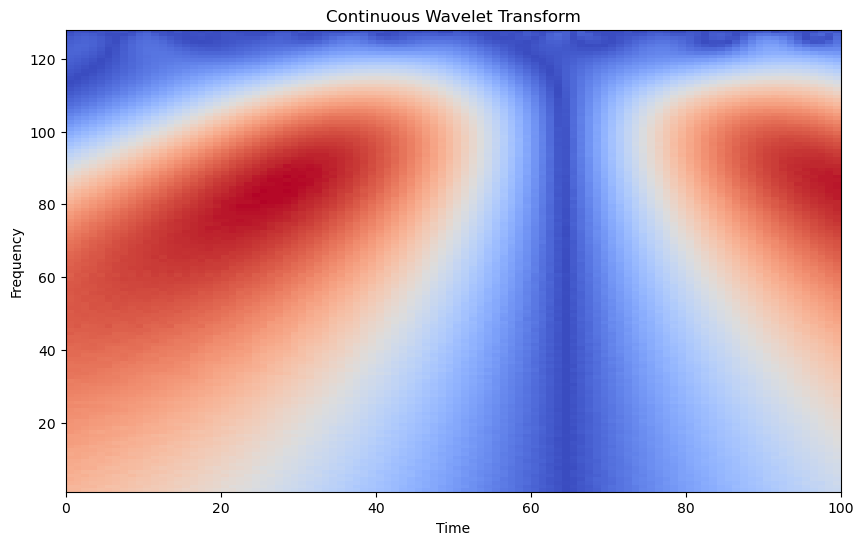

In [17]:
import pywt
import numpy as np

# Perform Continuous Wavelet Transform (CWT)
coefficients, frequencies = pywt.cwt(ts, np.arange(1, 128), 'gaus1')

# Plot the results
plt.figure(figsize=(10, 6))
plt.imshow(np.abs(coefficients), aspect='auto', extent=[0, len(df), 1, 128], cmap='coolwarm')
plt.title('Continuous Wavelet Transform')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

C:\Users\SCIENCE\Desktop\anaco\Lib\site-packages\pywt\_cwt.py:117: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should takethe form cmorB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: cmor1.5-1.0).
  wavelet = DiscreteContinuousWavelet(wavelet)


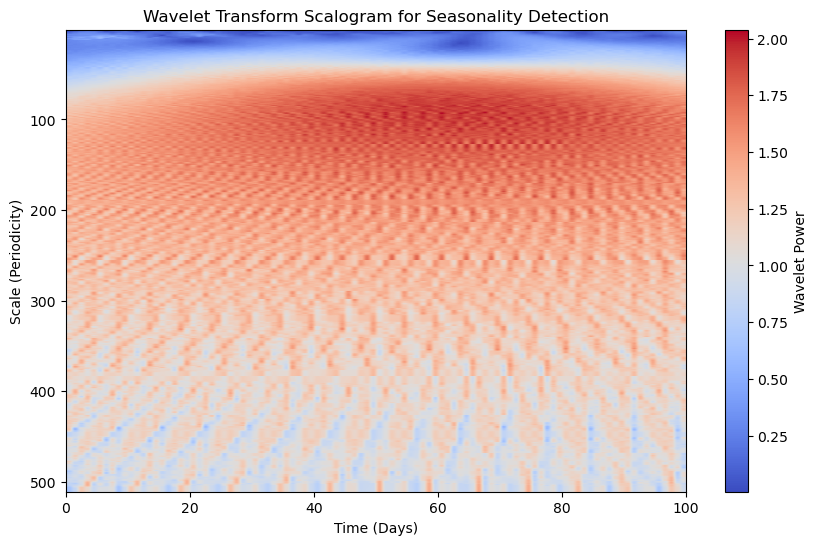

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
import pandas as pd

# Generate synthetic seasonal data (sinusoidal signal with noise)
time = ts# 3 years of daily data
signal = np.sin(2 * np.pi * time / 365) + 0.5 * np.sin(2 * np.pi * time / 30) + np.random.normal(0, 0.2, len(time))

# Perform Continuous Wavelet Transform (CWT)
scales = np.arange(1, 512)  # Scale range (affects frequency resolution)
coefficients, frequencies = pywt.cwt(signal, scales, 'cmor')  # 'cmor' is a complex Morlet wavelet

# Plot Scalogram
plt.figure(figsize=(10, 6))
plt.imshow(abs(coefficients), aspect='auto', extent=[0, len(time), scales[-1], scales[0]], cmap='coolwarm')
plt.colorbar(label="Wavelet Power")
plt.xlabel("Time (Days)")
plt.ylabel("Scale (Periodicity)")
plt.title("Wavelet Transform Scalogram for Seasonality Detection")
plt.show()

<Figure size 1000x600 with 0 Axes>

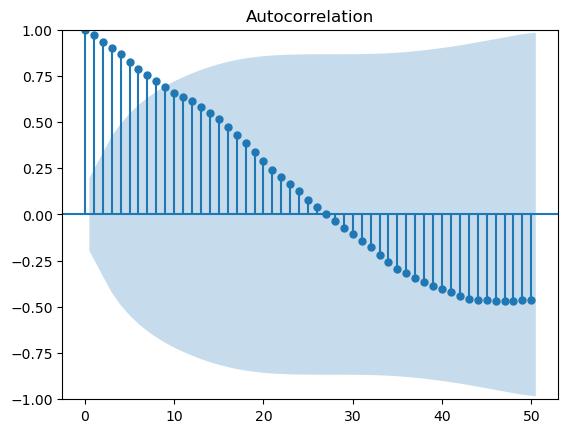

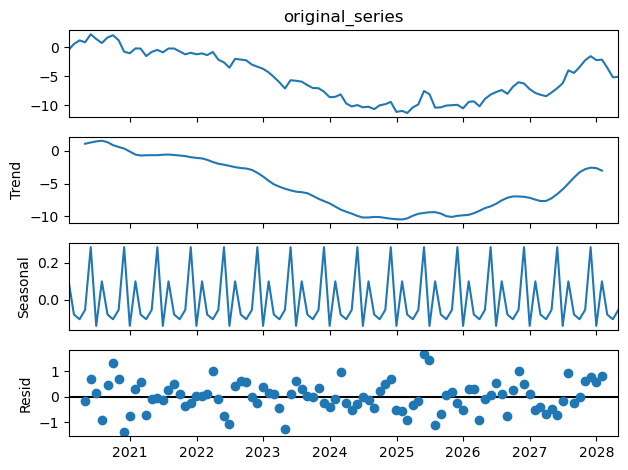

In [19]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose

# ACF Plot to identify potential seasonal lags
plt.figure(figsize=(10, 6))
plot_acf(ts, lags=50)  # Look at lags to identify seasonality period
plt.show()

# Seasonal Decomposition (period = 12 for monthly data with yearly seasonality)
result = seasonal_decompose(ts, model='additive', period=6)
result.plot()
plt.show()

In [20]:
import pmdarima as pm
auto_arima = pm.auto_arima(ts, stepwise=False, seasonal=True)
auto_arima 

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(0, 0, 0, 1),
      suppress_warnings=True)

In [21]:
len(ts)

100

In [22]:
train=ts[:92]
test=ts[92:]

In [23]:
import statsmodels.api as sm
model = sm.tsa.SARIMAX(train, order=(0,1,0), seasonal_order=(2,0,0,12)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                    original_series   No. Observations:                   92
Model:             SARIMAX(0, 1, 0)x(2, 0, 0, 12)   Log Likelihood                -111.651
Date:                            Mon, 10 Feb 2025   AIC                            229.301
Time:                                    17:11:18   BIC                            236.834
Sample:                                01-31-2020   HQIC                           232.340
                                     - 08-31-2027                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.1347      0.136      0.990      0.322      -0.132       0.401
ar.S.L24       0.0736      0.092      0.797      0.426      -0.107       0.255
sigma2         0.6782      0.092      7.399      0.000       0.499       0.858
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                 1.66
Prob(Q):                              0.72   Prob(JB):                         0.44
Heteroskedasticity (H):               1.34   Skew:                             0.17
Prob(H) (two-sided):                  0.43   Kurtosis:                         3.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: >

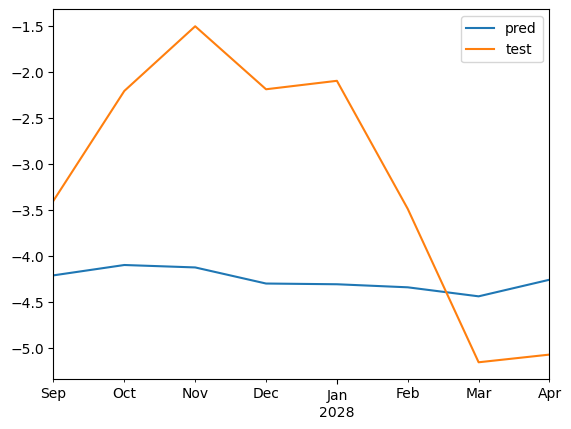

In [24]:
pred = model.predict(start=len(train), end=(len(ts)-1), dynamic=True)
pred.plot(label="pred",legend=True)
test.plot(label="test", legend=True)


In [25]:

actual   = test 
forecast = pred
APE = [] 
import numpy as np

for day in range(len(actual)):
    if actual.iloc[day] == 0:
        per_err = 0  # Handle zero actual values properly
    else:
        per_err = (actual.iloc[day] - forecast.iloc[day]) / actual.iloc[day]
# Iterate over the list values 

  
    # Take absolute value of 
    # the percentage error (APE) 
    per_err = abs(per_err) 
  
    # Append it to the APE list 
    APE.append(per_err) 
  
# Calculate the MAPE 
MAPE = sum(APE)/len(APE) 
  
# Print the MAPE value and percentage 
print(f''' 
MAPE   : { round(MAPE, 2) } 
MAPE % : { round(MAPE*100, 2) } % 
''')

 
MAPE   : 0.68 
MAPE % : 67.58 % 



In [ ]:
import itertools
import statsmodels.api as sm

# Define range of parameters
p = d = q = range(0, 3)
P = D = Q = range(0, 2)
m = 12  # Seasonality

pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], m) for x in itertools.product(P, D, Q)]

best_aic = float("inf")
best_order = None
best_seasonal_order = None

for param in pdq:
    for seasonal_param in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(ts,
                                              order=param,
                                              seasonal_order=seasonal_param,
                                              enforce_stationarity=False,
                                              enforce_invertibility=False)
            results = model.fit()
            if results.aic < best_aic:
                best_aic = results.aic
                best_order = param
                best_seasonal_order = seasonal_param
        except:
            continue

print(f"Best SARIMA order: {best_order}")
print(f"Best Seasonal order: {best_seasonal_order}")

C:\Users\SCIENCE\Desktop\anaco\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\SCIENCE\Desktop\anaco\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\SCIENCE\Desktop\anaco\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\SCIENCE\Desktop\anaco\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\SCIENCE\Desktop\anaco\Lib\site-packages\statsmodels\base\model.py:6

In [ ]:
from pmdarima import auto_arima
your_time_series=ts
auto_model = auto_arima(your_time_series, 
                         seasonal=True, 
                         m=12, 
                         stepwise=True, 
                         trace=True)
print(auto_model.summary())
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(your_time_series, lags=40, ax=axes[0])   # Check q
plot_pacf(your_time_series, lags=40, ax=axes[1])  # Check p
plt.show()

In [ ]:
ts=your_time_series
model = sm.tsa.SARIMAX(train, order=(0,1,0), seasonal_order=(2,0,0,12)).fit()
pred = model.predict(start=len(train), end=(len(ts)-1), dynamic=True)
pred.plot(label="pred",legend=True)
test.plot(label="test", legend=True)


In [ ]:

actual   = test 
forecast = pred
APE = [] 
import numpy as np

for day in range(len(actual)):
    if actual.iloc[day] == 0:
        per_err = 0  # Handle zero actual values properly
    else:
        per_err = (actual.iloc[day] - forecast.iloc[day]) / actual.iloc[day]
# Iterate over the list values 

  
    # Take absolute value of 
    # the percentage error (APE) 
    per_err = abs(per_err) 
  
    # Append it to the APE list 
    APE.append(per_err) 
  
# Calculate the MAPE 
MAPE = sum(APE)/len(APE) 
  
# Print the MAPE value and percentage 
print(f''' 
MAPE   : { round(MAPE, 2) } 
MAPE % : { round(MAPE*100, 2) } % 
''')

In [ ]:
##Validate the Model
##Check residuals: They should be normally distributed with no autocorrelation.
##Out-of-sample forecasting: Test on a validation set.
import statsmodels.api as sm
import matplotlib.pyplot as plt

best_model = sm.tsa.statespace.SARIMAX(your_time_series,
                                       order=best_order,
                                       seasonal_order=best_seasonal_order,
                                       enforce_stationarity=False,
                                       enforce_invertibility=False)
results = best_model.fit()

# Plot residuals
results.plot_diagnostics(figsize=(10, 6))
plt.show()

In [ ]:
forecast = results.get_forecast(steps=12)
forecast_ci = forecast.conf_int()

plt.figure(figsize=(10,5))
plt.plot(your_time_series, label="Observed")
plt.plot(ts, label="Observed")
plt.plot(forecast.predicted_mean, label="Forecast", color='red')
plt.fill_between(forecast_ci.index,
                 forecast_ci.iloc[:, 0],
                 forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.show()